In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use(["science", "notebook", "grid"])

In [3]:
mish_data = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/Imagenet/MISH/MISH.log")
relu_data = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/Imagenet/RELU/RELU.log")
sigmoid_data = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/Imagenet/SIGMOID/Sigmoid.log")
tanh_data = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/Imagenet/Tanh/Tanh.log")
dsrelu_data = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/Imagenet/DSRELU/DSReLU.log")
leaky_relu = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/Imagenet/LEAKY_RELU/LeakyReLU.log")

In [5]:
def plot_metrics(data, metric_name, color_codes, plotting_order, axis, show_legend = False) -> None:
    for func_name, func_data in zip(plotting_order, data):
        axis.plot(func_data["Epoch"], func_data[metric_name], label=func_name, color=color_codes[func_name])
    if show_legend: axis.legend()
    return axis

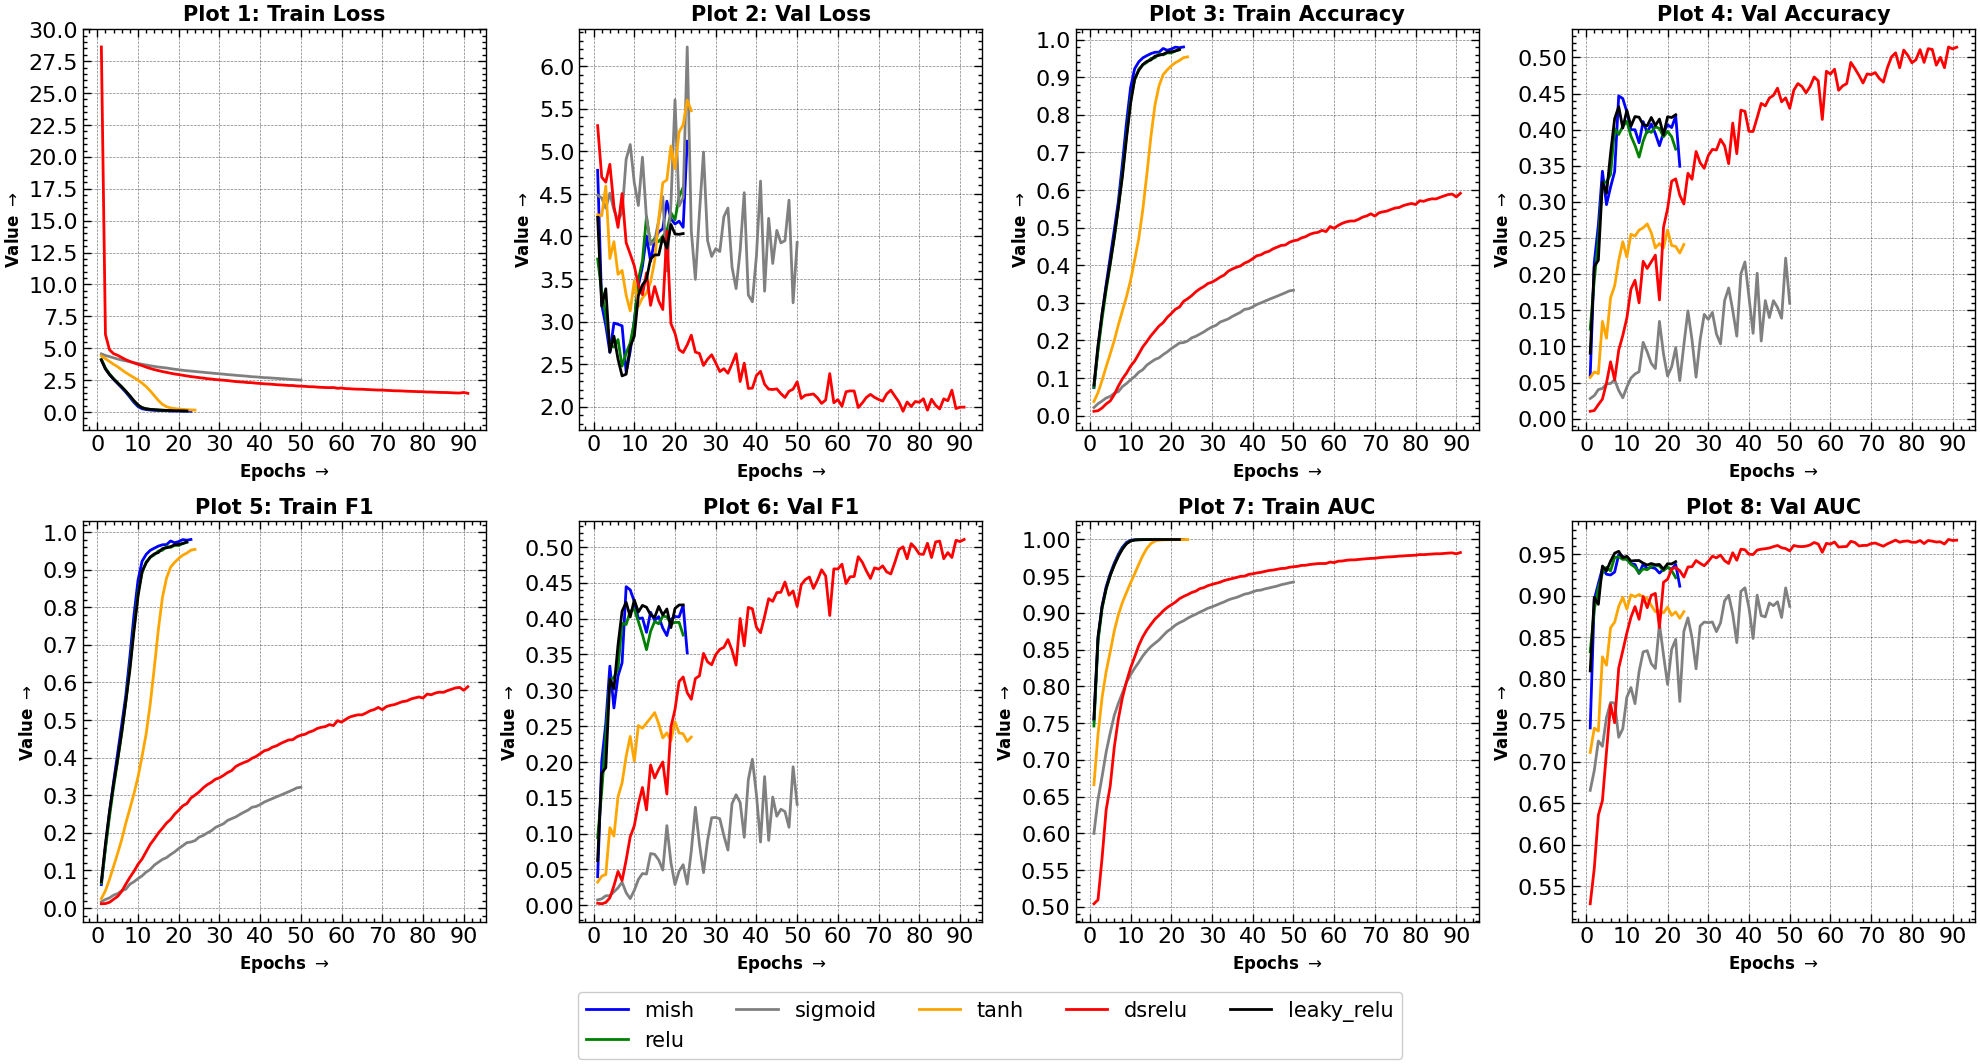

In [6]:
columns = ['Train Loss', 'Val Loss', 'Train Acc', 'Val Acc', 'Train F1', 'Val F1', 'Train AUC', 'Val AUC']
titles = ['Train Loss', 'Val Loss', 'Train Accuracy', 'Val Accuracy', 'Train F1', 'Val F1', 'Train AUC', 'Val AUC']
color_codes = {
    "mish" : "blue",
    "relu" : "green",
    "sigmoid" : "gray", 
    "tanh" : "orange", 
    "dsrelu" : "red", 
    "leaky_relu" : "black"}
plotting_order = ["mish", "relu", "sigmoid", "tanh", "dsrelu", "leaky_relu"]
data = [mish_data, relu_data, sigmoid_data, tanh_data, dsrelu_data, leaky_relu]

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = ax.flatten()

# Set titles
for idx, axi in enumerate(ax.flatten()):
    axi.set_title(f"Plot {idx+1}: {titles[idx]}", fontsize = 15, fontweight = 'bold')
    axi.locator_params(axis='both', nbins=15)
    axi.set_xlabel(r"Epochs $\rightarrow$", fontsize = 12, fontweight = 'bold')
    axi.set_ylabel(rf"Value $\rightarrow$", fontsize = 12, fontweight = 'bold')

axis1 = plot_metrics(data, columns[0], color_codes, plotting_order, ax1)
axis2 = plot_metrics(data, columns[1], color_codes, plotting_order, ax2)
axis3 = plot_metrics(data, columns[2], color_codes, plotting_order, ax3)
axis4 = plot_metrics(data, columns[3], color_codes, plotting_order, ax4)
axis5 = plot_metrics(data, columns[4], color_codes, plotting_order, ax5)
axis6 = plot_metrics(data, columns[5], color_codes, plotting_order, ax6)
axis7 = plot_metrics(data, columns[6], color_codes, plotting_order, ax7)
axis8 = plot_metrics(data, columns[7], color_codes, plotting_order, ax8)

handles = [plt.Line2D([0], [0], color=color_codes[func_name], label=func_name) for func_name in plotting_order]
labels = [h.get_label() for h in handles]
# Make figure legend at the bottom 
fig.legend(handles, labels, loc='lower center', ncol=5, fontsize = 15, bbox_to_anchor=(0.5, -0.08))

plt.tight_layout()

In [7]:
dsrelu_top_metrics = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/Imagenet/DSRELU/top_metrics.csv")
mish_top_metrics = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/Imagenet/MISH/top_metrics.csv")
relu_top_metrics = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/Imagenet/RELU/top_metrics.csv")
sigmoid_top_metrics = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/Imagenet/SIGMOID/top_metrics.csv")
tanh_top_metrics = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/Imagenet/Tanh/top_metrics.csv")
leaky_relu_top_metrics = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/Imagenet/LEAKY_RELU/top_metrics.csv")


dsrelu_top_metrics["Activation"] = "DSReLU"
mish_top_metrics["Activation"] = "Mish"
relu_top_metrics["Activation"] = "ReLU"
sigmoid_top_metrics["Activation"] = "Sigmoid"
tanh_top_metrics["Activation"] = "Tanh"
leaky_relu_top_metrics["Activation"] = "LeakyReLU"

In [10]:
combined_top_metrics = pd.concat([dsrelu_top_metrics, mish_top_metrics, relu_top_metrics, sigmoid_top_metrics, tanh_top_metrics, leaky_relu_top_metrics])

In [11]:
combined_top_metrics

,Train Acc,Val Acc,Train F1,Val F1,Train AUC,Val AUC,Activation
0,0.591152,0.514111,0.588727,0.510515,0.982171,0.967096,DSReLU
1,0.589069,0.514444,0.586834,0.509318,0.981722,0.968000,DSReLU
2,0.587868,0.485778,0.585523,0.485347,0.981425,0.962493,DSReLU
3,0.584265,0.500111,0.581939,0.492200,0.980952,0.965191,DSReLU
4,0.576201,0.511000,0.573714,0.508321,0.980508,0.965986,DSReLU
0,0.980368,0.349333,0.980369,0.352349,0.999975,0.911652,Mish
1,0.980000,0.402889,0.979999,0.402392,0.999964,0.932128,Mish
2,0.978382,0.418778,0.978382,0.418582,0.999964,0.937934,Mish
3,0.976373,0.377778,0.976373,0.376354,0.999959,0.927474,Mish
4,0.974902,0.406778,0.974902,0.403009,0.999951,0.934113,Mish


In [81]:
def slope(initial_slope, final_slope, steepness_param, times):
    return initial_slope + ((final_slope - initial_slope) / (1 + np.exp(-steepness_param * (times - 0.5))))

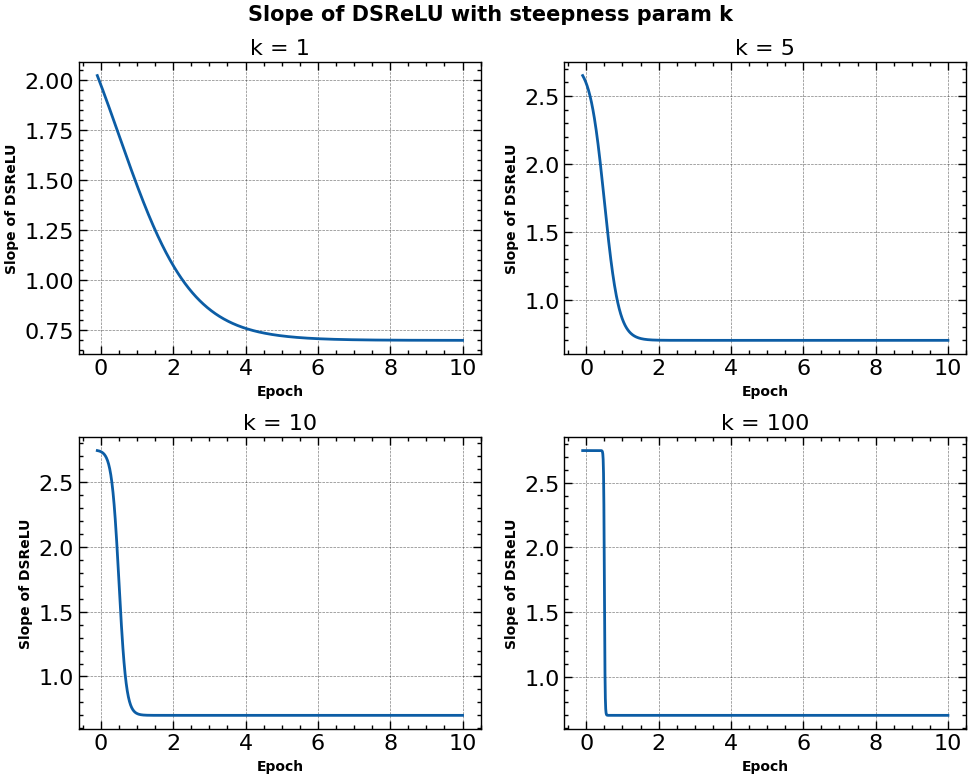

In [83]:
initial_slope, final_slope = np.math.tan(np.deg2rad(70)), np.math.tan(np.deg2rad(35))
steepness_params = [1, 5, 10, 100]
times = np.linspace(-0.1, 10, 1000)

fig, ax = plt.subplots(2, 2, figsize = (10, 8))
ax1, ax2, ax3, ax4 = ax.ravel()

for steepness_param, axi in zip(steepness_params, ax.ravel()):
    axi.plot(times, slope(initial_slope=initial_slope, 
                      final_slope=final_slope, 
                      steepness_param=steepness_param, 
                      times=times))
    axi.set_xlabel("Epoch", fontsize = 10, fontweight = "bold")
    axi.set_ylabel("Slope of DSReLU", fontsize = 10, fontweight = "bold")
    axi.set_title(f"k = {steepness_param}")
plt.suptitle("Slope of DSReLU with steepness param k", fontsize = 15, fontweight = "bold")
plt.tight_layout()

In [84]:
75 - 30

45